<a href="https://colab.research.google.com/github/AKHIL-882/Natural-Language-Processing/blob/main/KMeans%20using%20Categorical%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.1 Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

### **1.2 Importing the Spacy**

In [2]:
import spacy

from spacy import displacy

nlp = spacy.load('en')

### **1.3 Input String from user**

In [3]:
input_text = input()
text1= nlp(input_text)

London: Britain will build what it is calling a new "national flagship" vessel to host trade events and promote its post-Brexit interests around the world, Prime Minister Boris Johnson announced Saturday. The ship will provide a global platform for high level trade negotiations as well as British businesses' products, his office said, as the United Kingdom seeks new trading ties after leaving the European Union last year.  It will also be expected to play a role in delivering the country's foreign and security policies, including by hosting summits and other diplomatic talks.  It will be the first so-called national flagship in service since 1997, when the Royal Yacht Britannia was decommissioned.  However, Johnson insisted the new vessel's role will be "distinct" from those of forerunners, "reflecting the UK's burgeoning status as a great, independent maritime trading nation".  "Every aspect of the ship, from its build to the businesses it showcases on board, will represent and promot

### **1.4 Finding the Origins**

In [4]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

### **1.5 Spliting the text**

In [5]:
words_label = []
words_text = []
for word in text1.ents:
  words_label.append(word.label_)
  words_text.append(word.text)
  print(word.text,word.label_)

dataset =  [words_text,words_label]
print(dataset)

London GPE
Britain GPE
Boris Johnson PERSON
Saturday DATE
British NORP
the United Kingdom GPE
the European Union ORG
last year DATE
first ORDINAL
1997 DATE
the Royal Yacht Britannia ORG
Johnson PERSON
UK GPE
British NORP
2022 DATE
four years DATE
Johnson PERSON
the Royal Navy ORG
around 30 years' DATE
Prince Philip PERSON
Queen Elizabeth II's PERSON
navy ORG
April DATE
99 DATE
Britain GPE
EU ORG
nearly five decades DATE
January 2020 DATE
the start of this year DATE
Japan GPE
[['London', 'Britain', 'Boris Johnson', 'Saturday', 'British', 'the United Kingdom', 'the European Union', 'last year', 'first', '1997', 'the Royal Yacht Britannia', 'Johnson', 'UK', 'British', '2022', 'four years', 'Johnson', 'the Royal Navy', "around 30 years'", 'Prince Philip', "Queen Elizabeth II's", 'navy', 'April', '99', 'Britain', 'EU', 'nearly five decades', 'January 2020', 'the start of this year', 'Japan'], ['GPE', 'GPE', 'PERSON', 'DATE', 'NORP', 'GPE', 'ORG', 'DATE', 'ORDINAL', 'DATE', 'ORG', 'PERSON', 

### **1.6 Converting to dataframe**

In [6]:
# import pandas as pd
import pandas as pd
df = pd.DataFrame(dataset)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,London,Britain,Boris Johnson,Saturday,British,the United Kingdom,the European Union,last year,first,1997,the Royal Yacht Britannia,Johnson,UK,British,2022,four years,Johnson,the Royal Navy,around 30 years',Prince Philip,Queen Elizabeth II's,navy,April,99,Britain,EU,nearly five decades,January 2020,the start of this year,Japan
1,GPE,GPE,PERSON,DATE,NORP,GPE,ORG,DATE,ORDINAL,DATE,ORG,PERSON,GPE,NORP,DATE,DATE,PERSON,ORG,DATE,PERSON,PERSON,ORG,DATE,DATE,GPE,ORG,DATE,DATE,DATE,GPE


### **1.7 Transforming the dataframe**

In [7]:
dataset_transpose = df.T
print(dataset_transpose)

                            0        1
0                      London      GPE
1                     Britain      GPE
2               Boris Johnson   PERSON
3                    Saturday     DATE
4                     British     NORP
5          the United Kingdom      GPE
6          the European Union      ORG
7                   last year     DATE
8                       first  ORDINAL
9                        1997     DATE
10  the Royal Yacht Britannia      ORG
11                    Johnson   PERSON
12                         UK      GPE
13                    British     NORP
14                       2022     DATE
15                 four years     DATE
16                    Johnson   PERSON
17             the Royal Navy      ORG
18           around 30 years'     DATE
19              Prince Philip   PERSON
20       Queen Elizabeth II's   PERSON
21                       navy      ORG
22                      April     DATE
23                         99     DATE
24                    Bri

### **1.8 Renaming the columns in the dataframe**

In [8]:

dataset_transpose = dataset_transpose.rename(columns = {0: 'text', 1: 'labels'}, inplace = False)


### **1.9 Printing the dataframe**

In [9]:
dataset_transpose.columns
print(dataset_transpose)

                         text   labels
0                      London      GPE
1                     Britain      GPE
2               Boris Johnson   PERSON
3                    Saturday     DATE
4                     British     NORP
5          the United Kingdom      GPE
6          the European Union      ORG
7                   last year     DATE
8                       first  ORDINAL
9                        1997     DATE
10  the Royal Yacht Britannia      ORG
11                    Johnson   PERSON
12                         UK      GPE
13                    British     NORP
14                       2022     DATE
15                 four years     DATE
16                    Johnson   PERSON
17             the Royal Navy      ORG
18           around 30 years'     DATE
19              Prince Philip   PERSON
20       Queen Elizabeth II's   PERSON
21                       navy      ORG
22                      April     DATE
23                         99     DATE
24                    Bri

### **2.0 Description of dataframe**

In [10]:
dataset_transpose.describe()

,text,labels
count,30,30
unique,27,6
top,Britain,DATE
freq,2,11


### **2.1 Information of dataframe**

In [11]:
dataset_transpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30 non-null     object
 1   labels  30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes


### **2.2 Encoding the dataframe**

In [18]:
data_mapped = dataset_transpose.copy()
data_mapped['labels'] = data_mapped['labels'].map({'GPE':0, "CARDINAL":1, "PERSON":2, "DATE":3,"ORG":4,"NORP":5,"ORDINAL":6})
data_mapped

,text,labels
0,London,0
1,Britain,0
2,Boris Johnson,2
3,Saturday,3
4,British,5
5,the United Kingdom,0
6,the European Union,4
7,last year,3
8,first,6
9,1997,3


### **2.3 Spliting the dataframe**

In [19]:
x = data_mapped.iloc[:,1:2]
x

,labels
0,0
1,0
2,2
3,3
4,5
5,0
6,4
7,3
8,6
9,3


### **2.4 Applying KMeans**

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### **2.5 Predicting the clusters**

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 1], dtype=int32)

### **2.6 Add a new columns for further classification**

In [22]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,text,labels,Cluster
0,London,0,1
1,Britain,0,1
2,Boris Johnson,2,2
3,Saturday,3,2
4,British,5,0
5,the United Kingdom,0,1
6,the European Union,4,0
7,last year,3,2
8,first,6,0
9,1997,3,2


### **2.7 Cluster the data**

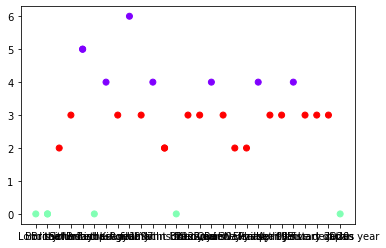

In [23]:
plt.scatter(data_with_cluster['text'], data_with_cluster['labels'], c=data_with_cluster['Cluster'], cmap = "rainbow")

plt.show()